In [1601]:
import pandas as pd
import numpy as np
import csv 
import sklearn as sk
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
import statsmodels.api as smk
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical
from math import sqrt
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [1602]:
data = pd.read_csv('Data.csv')


In [1603]:
data['Male'] = data['Male'].str.replace(',','')
data['Female'] = data['Female'].str.replace(',','')
data['Unknown'] = data['Unknown'].str.replace(',','')
data['Total'] = data['Total'].str.replace(',','')
data['Male'] = pd.to_numeric(data['Male'])
data['Female'] = pd.to_numeric(data['Female'])
data['Unknown'] = pd.to_numeric(data['Unknown'])
data['Total'] = pd.to_numeric(data['Total'])

In [1604]:
data

,Year,Make,Model,Make/Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,2013,Ford,Focus,Ford Focus,30.619322,5.966102,94.033898,1497.169492,gasoline,814172,422731,56487,1293390
1,2013,Ford,Fiesta,Ford Fiesta,18.532143,5.714286,68.571429,1166.142857,gasoline,554879,631666,54057,1240602
2,2013,Volkswagen,Golf,Volkswagen Golf,31.242154,6.164835,89.461538,1537.406593,gasoline,483216,310604,47563,841383
3,2013,Renault,Clio,Renault Clio,22.100000,5.615385,75.576923,1219.653846,gasoline,241287,312556,28004,581847
4,2013,BMW,320i,BMW 320i,47.848370,6.444444,126.111111,1995.777778,gasoline,408016,115843,29125,552984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,1994,Land-Rover,Defender,Land-Rover Defender,108.747195,7.853659,207.609756,2304.975610,diesel,1012,150,80,1242
6088,1994,Toyota,RAV4,Toyota RAV4,43.548516,1.354839,137.774194,2261.193548,gasoline,670,482,66,1218
6089,1994,Alfa-Romeo,Spider,Alfa-Romeo Spider,55.200000,6.000000,163.500000,2696.500000,gasoline,790,247,81,1118
6090,1994,Honda,Shuttle,Honda Shuttle,30.081000,4.000000,110.000000,2254.000000,gasoline,639,416,49,1104


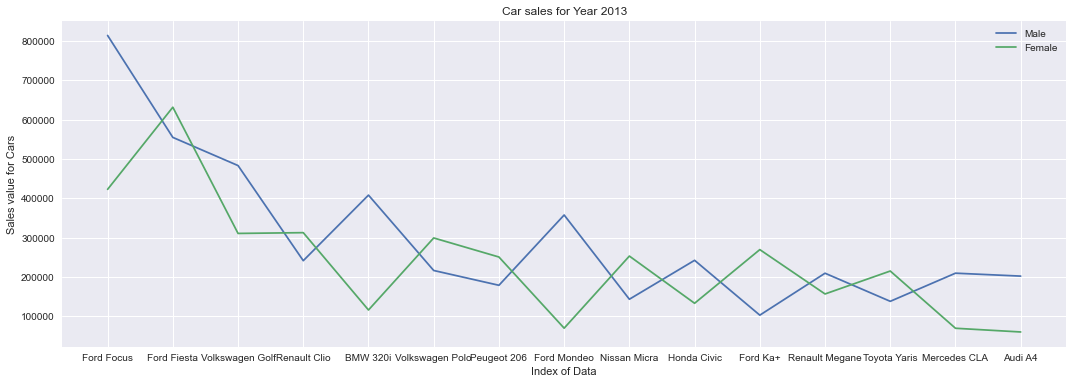

In [1605]:
data1 = data[:15]
x = data1['Make/Model']
y = data1['Male']
z = data1['Female']
plt.figure(figsize=(18, 6))
plt.title("Car sales for Year 2013")
plt.plot(x, y, label= 'Male')
plt.plot(x, z, label= 'Female')
plt.xlabel("Index of Data")
plt.ylabel("Sales value for Cars")
plt.legend()



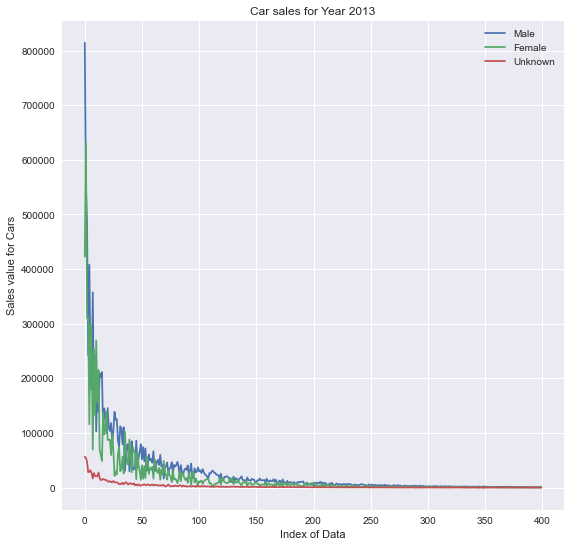

In [1606]:

x = data['Male']
y = data['Female']
z = data['Unknown']
wid = 0.35
i = np.arange(400)

plt.figure(figsize=(9, 9))
plt.title("Car sales for Year 2013")
plt.plot(i, x[:400], label='Male')
plt.plot(i, y[:400], label='Female')
plt.plot(i, z[:400], label='Unknown')
plt.xlabel("Index of Data")
plt.ylabel("Sales value for Cars")
plt.legend()

In [1607]:
x = data['Make/Model']
y = data['Total']
z = data['Year']

fig = px.scatter(y,color = x)
fig.update_layout(
    title="Car Sales value with respect to Year",
    xaxis_title="Index of Car in Data",
    yaxis_title="Sales value in Millions for Male Gender",
    legend_title="Car Model with Company",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="Black"
    )
)
fig.show()
# You can double click on Car model to see its specific graph and its trend through out year

In [1608]:
scaler = StandardScaler()
data['Year'] = scaler.fit_transform(data[['Year']])
data['Price'] = scaler.fit_transform(data[['Price']])
data['Transmission'] = scaler.fit_transform(data[['Transmission']])
data['Engine CC'] = scaler.fit_transform(data[['Engine CC']])
data['Power'] = scaler.fit_transform(data[['Power']])

In [1609]:
y = data['Male']/data['Female']
y = y.astype(int)
for i in range(len(y)):
    y[i] = 0 if (y[i] == 0) else 1 
data['Gender'] = y
data = data.drop('Make/Model',1)
data

,Year,Make,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total,Gender
0,1.472231,Ford,Focus,-0.206621,0.621107,-0.258000,-0.593281,gasoline,814172,422731,56487,1293390,1
1,1.472231,Ford,Fiesta,-0.441992,0.433709,-0.634573,-0.998285,gasoline,554879,631666,54057,1240602,0
2,1.472231,Volkswagen,Golf,-0.194493,0.769002,-0.325622,-0.544052,gasoline,483216,310604,47563,841383,1
3,1.472231,Renault,Clio,-0.372516,0.360108,-0.530966,-0.932815,gasoline,241287,312556,28004,581847,0
4,1.472231,BMW,320i,0.128877,0.977084,0.216401,0.016754,gasoline,408016,115843,29125,552984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,-1.935380,Land-Rover,Defender,1.314747,2.025803,1.421712,0.395050,diesel,1012,150,80,1242,1
6088,-1.935380,Toyota,RAV4,0.045147,-2.810537,0.388890,0.341484,gasoline,670,482,66,1218,1
6089,-1.935380,Alfa-Romeo,Spider,0.272033,0.646334,0.769358,0.874071,gasoline,790,247,81,1118,1
6090,-1.935380,Honda,Shuttle,-0.217104,-0.842041,-0.021872,0.332683,gasoline,639,416,49,1104,1


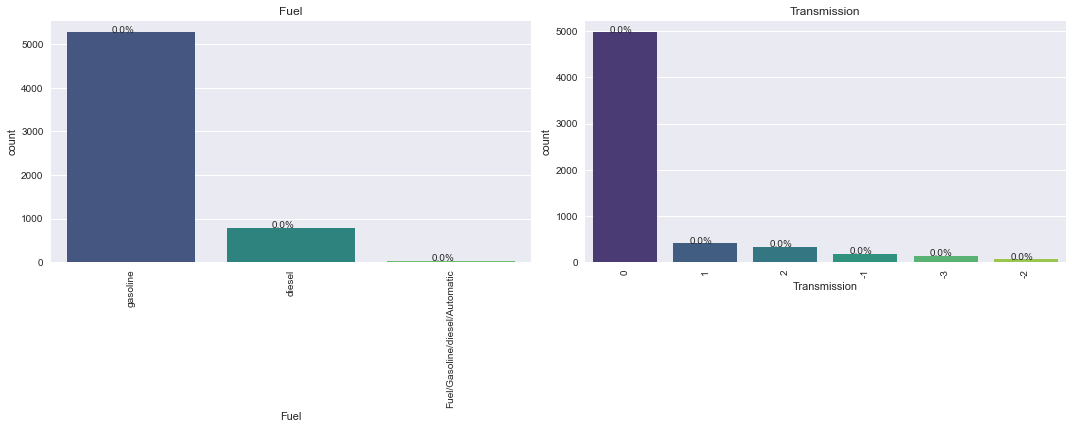

In [1758]:
car_f = ['Fuel','Transmission']
plt.figure(figsize=(15,21))

for i, j in enumerate(car_f):
                     plt.subplot(4,2,i+1)
                     order = data[j].value_counts(ascending=False).index    
                     ax=sns.countplot(x=data[j], data=data , order=order ,palette='viridis')
                     for o in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[j]))
                           x = o.get_x()+o.get_width()/2-0.05
                           y = o.get_y()+ o.get_height()
                           plt.annotate(percentage,(x,y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(j)

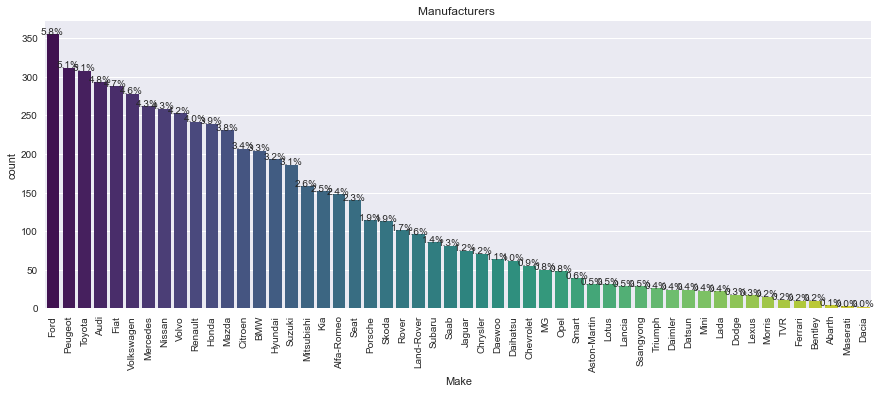

In [1611]:
car = ['Make']
plt.figure(figsize=(24,20))

for i, j in enumerate(car):
                     plt.subplot(4,2,i+1)
                     order = data[j].value_counts(ascending=False).index    
                     ax=sns.countplot(x=data[j], data=data , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[j]))
                           x = p.get_x()+p.get_width()/2-0.05
                           y = p.get_y()+ p.get_height()
                           plt.annotate(percentage,(x,y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title("Manufacturers ")

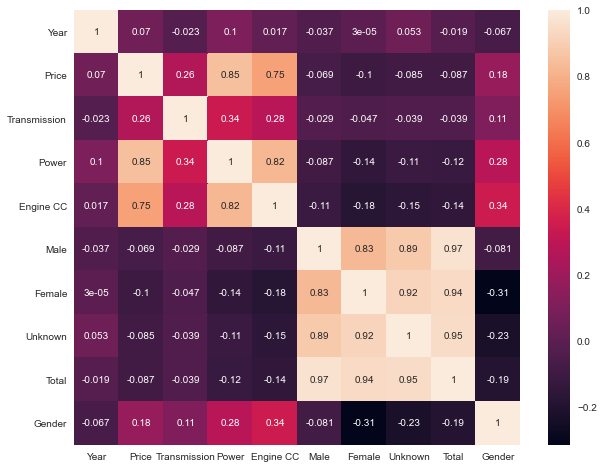

In [1612]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [1613]:
# X = data[['Year','Price','Transmission','Engine CC','Power']]
# X =X.values

In [1614]:
# pca = PCA(n_components=2)
# pc = pca.fit_transform(X)

In [1615]:
# pc_d = pd.DataFrame(data = pc,columns=['Comp1','Comp2'])
# Comp1 = pc_d['Comp1']
# Comp2 = pc_d['Comp2']

In [1616]:
# data['Pca_comp1'] = Comp1
# data['Pca_comp2'] = Comp2

In [1617]:
data

,Year,Make,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total,Gender
0,1.472231,Ford,Focus,-0.206621,0,-0.258000,-0.593281,gasoline,814172,422731,56487,1293390,1
1,1.472231,Ford,Fiesta,-0.441992,0,-0.634573,-0.998285,gasoline,554879,631666,54057,1240602,0
2,1.472231,Volkswagen,Golf,-0.194493,0,-0.325622,-0.544052,gasoline,483216,310604,47563,841383,1
3,1.472231,Renault,Clio,-0.372516,0,-0.530966,-0.932815,gasoline,241287,312556,28004,581847,0
4,1.472231,BMW,320i,0.128877,0,0.216401,0.016754,gasoline,408016,115843,29125,552984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,-1.935380,Land-Rover,Defender,1.314747,2,1.421712,0.395050,diesel,1012,150,80,1242,1
6088,-1.935380,Toyota,RAV4,0.045147,-2,0.388890,0.341484,gasoline,670,482,66,1218,1
6089,-1.935380,Alfa-Romeo,Spider,0.272033,0,0.769358,0.874071,gasoline,790,247,81,1118,1
6090,-1.935380,Honda,Shuttle,-0.217104,0,-0.021872,0.332683,gasoline,639,416,49,1104,1


In [1618]:
feature = data[['Year','Price','Transmission','Power','Fuel','Engine CC','Gender','Make']]
feature = pd.get_dummies(feature)
labels = data[['Model']]
lb = preprocessing.LabelEncoder()
labels = lb.fit_transform(labels)
labels = labels.reshape(-1,1)
inverted = lb.inverse_transform(labels)
inverted

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array(['Focus', 'Fiesta', 'Golf', ..., 'Spider', 'Shuttle', 'Space'],
      dtype=object)

In [1619]:
# from sklearn import manifold

# tsne = manifold.TSNE(n_components=2, random_state=42)
# tsne_p = tsne.fit_transform(features)

In [1620]:
# cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'targets'],data=np.column_stack((tsne_p, labels)))
# cps_df.loc[:, 'targets'] = cps_df.targets.astype(int)
# cps_df.head()

In [1621]:
# grid = sns.FacetGrid(cps_df, hue="targets", height=6)
# grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

In [1622]:
features1 = data[['Make','Model','Price','Transmission','Power','Fuel','Engine CC']]
labels1 = data[['Gender']]
features1 = pd.get_dummies(features1)
lb = preprocessing.LabelEncoder()
labels1 = lb.fit_transform(labels1)

In [1623]:
X_train,X_test,y_train,y_test = train_test_split(features1,labels1, test_size = 0.2)
model = LogisticRegression(multi_class ='ovr' ,solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [1624]:
y_pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

Accuracy: 94.50369155045118
[[ 147   33]
 [  34 1005]]
F1 score: 0.9450369155045119


<AxesSubplot:>

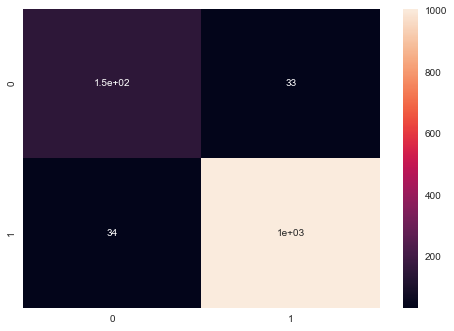

In [1625]:
print("Accuracy:", accuracy_score(y_test,y_pred) * 100)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("F1 score:",f1_score(y_test, y_pred, average='micro',labels=np.unique(y_pred)))
sns.heatmap(cm,annot= True)

In [1626]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)

In [1627]:
print("Actual values for gender:", y_test[:15])
print("Predicted values for gender:", y_pred[:15])

Actual values for gender: [1 1 1 1 0 0 0 1 1 1 0 1 1 1 0]
Predicted values for gender: [1 1 1 1 0 0 0 1 1 1 0 1 1 1 0]


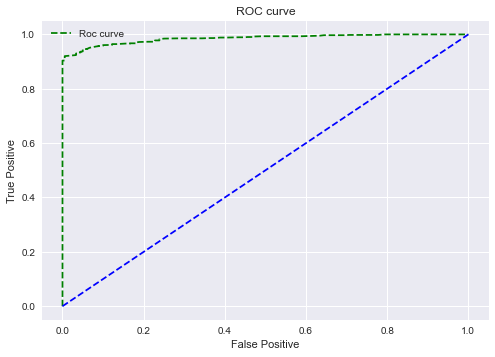

In [1628]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Roc curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive')
# y label
plt.ylabel('True Positive')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show()

# Ridge Regression

In [1683]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(feature,labels, test_size = 0.1)

In [1684]:
model1 = Ridge()
model1.fit(X_train1,y_train1)

Ridge()

In [1685]:
y_pred1 = model1.predict(X_test1)

In [1686]:
# print("MAE",mean_absolute_error(y_test,y_pred1)) 
# print("MSE",mean_squared_error(y_test,y_pred1))
print("Accuracy:", r2_score(y_test1,y_pred1)*100)


Accuracy: 32.98547980255504


In [1692]:
# g = X_test['Gender']
# # px.scatter(y_test,y_pred,color=g)
# fig = px.scatter(y_test,y_pred1)
# fig.show()


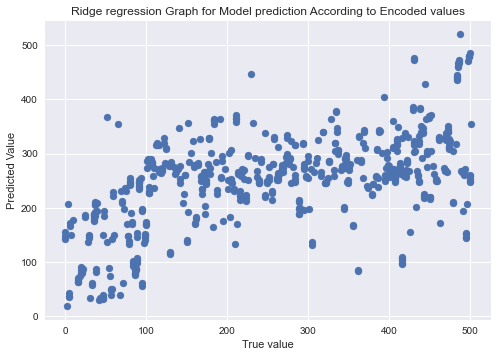

In [1689]:
plt.scatter(y_test1,y_pred1)
plt.title("Ridge regression Graph for Model prediction According to Encoded values")
plt.xlabel("True value")
plt.ylabel("Predicted Value")
plt.show()

# Logistic Regression with One vs All classifier

In [1747]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(feature,labels, test_size = 0.2)
model2 = OneVsRestClassifier(LogisticRegression())
model2.fit(X_train2,y_train2)

OneVsRestClassifier(estimator=LogisticRegression())

In [1748]:
y_pred2 = model2.predict(X_test2)
pred_prob2 = model2.predict_proba(X_test2)

In [1749]:
print("Accuracy:", accuracy_score(y_test2,y_pred2))
result = confusion_matrix(y_test2, y_pred2)
print('Confusion Matrix:')
print(result)
result = classification_report(y_test2, y_pred2)
print(result)
print("F1 score:",f1_score(y_test2, y_pred2, average='micro',labels=np.unique(y_pred)))

Accuracy: 0.49794913863822804
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.57      0.80      0.67         5
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         3
          10       0.29      1.00      0.44         2
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [1750]:
# plt.scatter(y_test,y_pred2)
# plt.xlabel("True value")
# plt.ylabel("Predicted Value")
# plt.show()

In [1755]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    pred_prob = model2.predict_proba(X_test2)
    predictions = pred_prob[:, 1]
    fpr, tpr, threshold = roc_curve(y_test2, predictions,pos_label=7)

    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

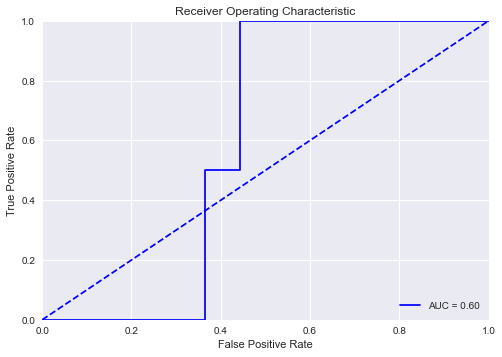

In [1756]:
import sklearn.metrics as metrics
plot_roc(model2, X_test2, y_test2)

In [1712]:
x = X_test2[['Gender']]
l = np.array(x)
print("Gender \n",l[60:75])
y = y_test2[60:75]
inv = lb.inverse_transform(y_test2)
inv1 = lb.inverse_transform(y_pred2)
y1 = y_pred2[60:75]
print("Predicted label with encoded String for car model:\n",y1)
print("Actual label with encoded string for car model:\n",y)
print("Gender: ", np.transpose(l[60:75]))
print("Actual car models:\n",inv[60:75])
print("Predicted car models:\n",inv1[60:75])

Gender 
 [[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
Predicted label with encoded String for car model:
 [351 302 397 410 167 495 299 265 192 316 240 146 383 269 360]
Actual label with encoded string for car model:
 [[351]
 [165]
 [180]
 [451]
 [167]
 [495]
 [236]
 [265]
 [348]
 [316]
 [240]
 [146]
 [380]
 [265]
 [360]]
Gender:  [[0 1 1 1 0 1 1 1 1 1 1 1 1 1 0]]
Actual car models:
 ['Puma' 'Cerato' 'Corrado' 'Tucson' 'Cinquecento' 'Z3' 'Granada' 'Kangoo'
 'Prisma' 'Nexia' 'Hilux' 'CLK' 'S40' 'Kangoo' 'RAV4']
Predicted car models:
 ['Puma' 'Mentor' 'Scirocco' 'Sonata' 'Cinquecento' 'Z3' 'Maverick'
 'Kangoo' 'Dedra' 'Nexia' 'Hilux' 'CLK' 'S70' 'Laguna' 'RAV4']


# KNN classifier

In [1651]:
feature = data[['Year','Price','Transmission','Power','Fuel','Engine CC','Gender','Make']]
feature = pd.get_dummies(feature)
labels = data[['Model']]
lb = preprocessing.LabelEncoder()
labels = lb.fit_transform(labels)
labels = labels.reshape(-1,1)
inverted = lb.inverse_transform(labels)
X_train3, X_test3, y_train3, y_test3 = train_test_split(feature, labels,test_size=0.2, random_state = 99)
knn_clf=KNeighborsClassifier(n_neighbors=4)
knn_clf.fit(X_train3,y_train3)


<ipython-input-1651-b26fccb72de2>:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(n_neighbors=4)

In [1652]:
ypred=knn_clf.predict(X_test3)
ypred_prob = clf.predict_proba(X_test3)

In [1653]:
result = confusion_matrix(y_test3, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test3, ypred)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test3,ypred)
print('Accuracy:',result2 * 100)
print("F1 score:",f1_score(y_test3, ypred, average='micro',labels=np.unique(ypred))* 100)

Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.20      1.00      0.33         1
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         1
          10       0.50      0.50      0.50         4
          13       0.67      1.00      0.80         2
          15       0.60      1.00      0.75         3
          16       0.50      0.50      0.50         2
          17       0.33      0.33      0.33         3
          18       0.00      0.00      0.00         2
          19       0.00     

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [1654]:
inv = lb.inverse_transform(y_test3)
inv1 = lb.inverse_transform(ypred)
fig = px.scatter(inv1, color=inv)
fig.show()


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [1740]:
g = X_test3['Gender']
inv = lb.inverse_transform(y_test3)
inv1 = lb.inverse_transform(ypred)
fig = px.scatter(inv1,g, color=inv1)
fig.update_layout(
    title="Car categorized to gender",
    xaxis_title="Gender 0 Female 1 Male",
    yaxis_title="Car index",
    legend_title="Car Model with Company",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="Black"
    )
)
fig.show()



In [1734]:
def plot_roc(model, X_test3, y_test3):
    # calculate the fpr and tpr for all thresholds of the classification
    ypred_prob = clf.predict_proba(X_test3)
    predictions = ypred_prob[:, 1]
    fpr, tpr, threshold = roc_curve(y_test3, predictions,pos_label=4)
    fpr1, tpr1, threshold1 = roc_curve(y_test3, predictions,pos_label=1)
    fpr2, tpr2, threshold2 = roc_curve(y_test3, predictions,pos_label=0)
    fpr3, tpr3, threshold3 = roc_curve(y_test3, predictions,pos_label=2)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    roc_auc2 = metrics.auc(fpr2, tpr2)
    roc_auc3 = metrics.auc(fpr3, tpr3)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.plot(fpr1, tpr1, 'r', label='AUC = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, 'g', label='AUC = %0.2f' % roc_auc2)
    plt.plot(fpr3, tpr3, 'y', label='AUC = %0.2f' % roc_auc3)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

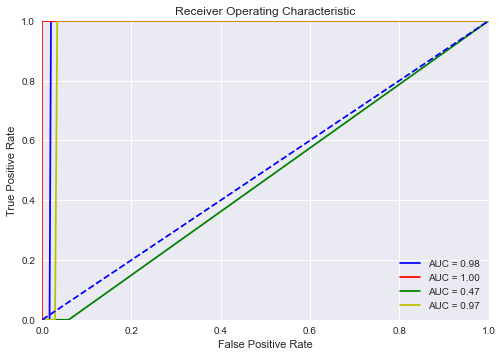

In [1735]:
import sklearn.metrics as metrics
plot_roc(clf, X_test3, y_test3)

In [1715]:
x = X_test1[['Gender']]
l = np.array(x)
print("Gender \n",l[60:75])
y = y_test3[60:75]
inv = lb.inverse_transform(y_test3)
inv1 = lb.inverse_transform(ypred)
y1 = ypred[60:75]
print("Predicted label with encoded String for car model:\n",y1)
print("Actual label with encoded string for car model:\n",y)
print("Gender :",np.transpose(l[60:75]))
print("Actual car models:\n",inv[60:75])
print("Predicted car models:\n",inv1[60:75])

Gender 
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
Predicted label with encoded String for car model:
 [109 271 234  78 408  62 180 270 288  94 372 340 256  21 349]
Actual label with encoded string for car model:
 [[278]
 [271]
 [234]
 [ 78]
 [408]
 [288]
 [180]
 [270]
 [ 48]
 [ 94]
 [372]
 [340]
 [124]
 [ 22]
 [349]]
Gender : [[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1]]
Actual car models:
 ['Leon' 'Lanos' 'Golf' '806' 'Silvia' 'MX-3' 'Corrado' 'Lancer' '323' '99'
 'Roadster-coupe' 'Polo' 'Beetle' '166' 'Prius']
Predicted car models:
 ['Alhambra' 'Lanos' 'Golf' '806' 'Silvia' '5' 'Corrado' 'Lancer' 'MX-3'
 '99' 'Roadster-coupe' 'Polo' 'Jetta' '164' 'Prius']


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

